# MLP vs. CNN image classification

## Import data and packages

In [2]:
from tensorflow.keras import datasets, layers, models, callbacks
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4423680/4422102 [==============================] - 1s 0us/step


## Data Visualization

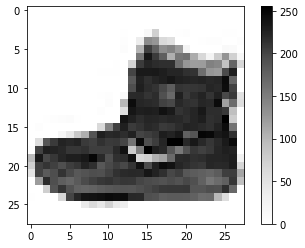

In [46]:
plt.figure()
plt.imshow(x_train[0],cmap = 'Greys')
plt.colorbar() 
plt.show()


In [47]:
x_train = x_train/255
x_test = x_test/255


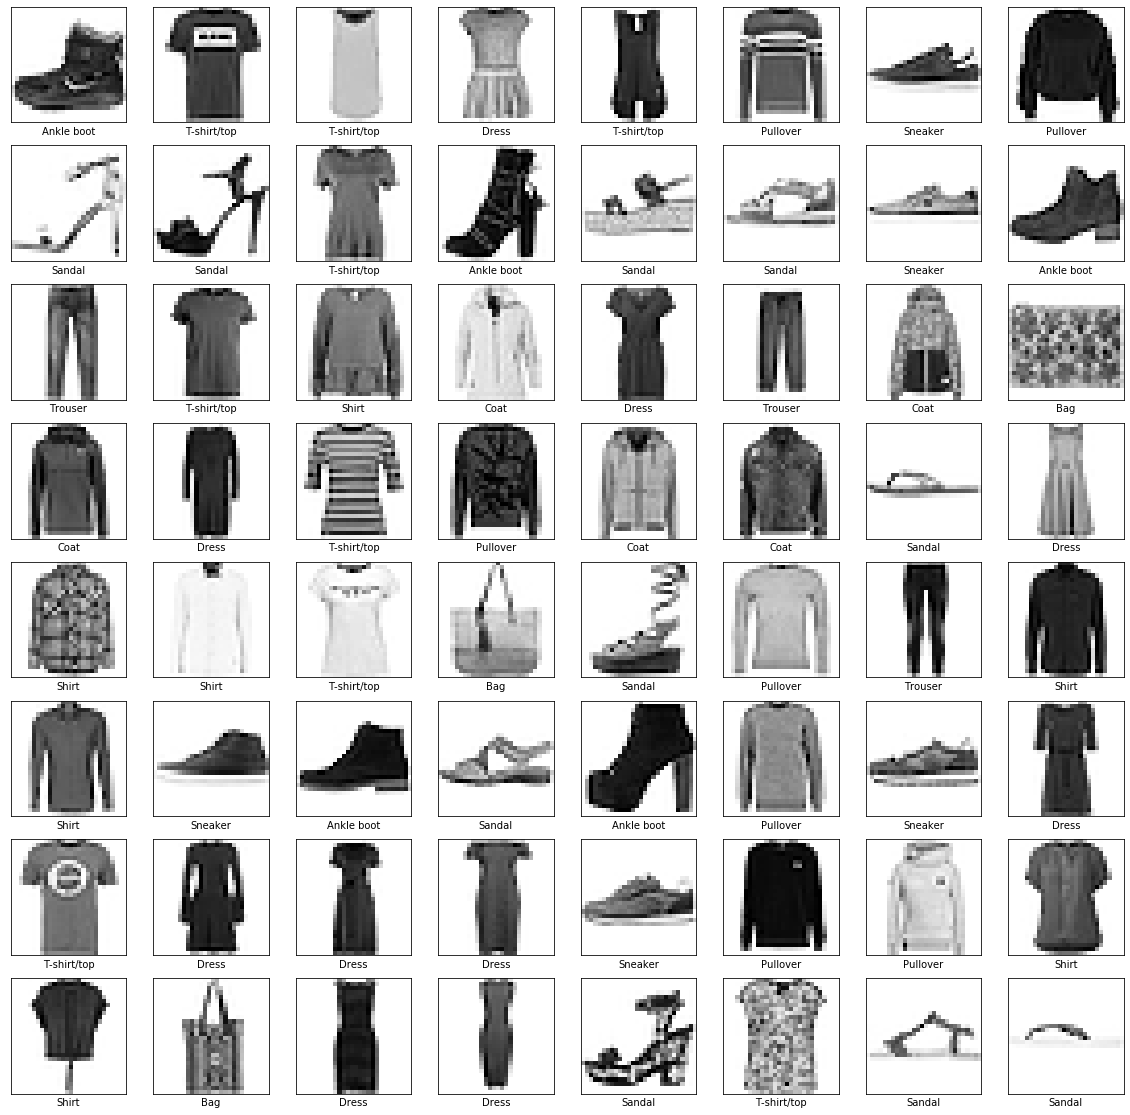

In [304]:
plt.figure(figsize = (20,20))
for i in range(64):
    plt.subplot(8,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap="Greys")
    plt.xlabel(class_names[y_train[i]])
plt.show()

## Creating the networks

In [92]:
def create_mlp():
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(28,28)))
    model.add(layers.Dense(128,activation = 'relu'))
    model.add(layers.Dense(1028,activation = 'relu'))
    model.add(layers.Dense(512,activation = 'relu'))
    model.add(layers.Dense(10,activation = 'softmax'))
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return(model)

def create_cnn():
    model = models.Sequential()
    model.add(layers.Conv2D(filters = 32, kernel_size = (3,3), activation  = 'relu', input_shape = (28, 28,1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10,activation = 'softmax'))
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return(model)


def create_callbacks(mod):
    if mod == "mlp":
        filepath = "models/best-weights-mlp.hdf5"
    elif mod == "cnn":
        filepath = "models/best-weights-cnn.hdf5"
    else:
        print("Error")
        return(-1)
    model_checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
    return([model_checkpoint])

## Default Dataset

### MLP

In [296]:
model = create_mlp()
callbacks_list = create_callbacks("mlp")
history = model.fit(x_train, 
          y_train, 
          epochs=10,
          validation_split = 0.2,
          callbacks = callbacks_list
         )

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
47904/48000 [============================>.] - ETA: 0s - loss: 1.3419 - accuracy: 0.7202
Epoch 00001: val_accuracy improved from -inf to 0.78700, saving model to models/best-weights-mlp.hdf5
48000/48000 [==============================] - 7s 147us/sample - loss: 1.3401 - accuracy: 0.7204 - val_loss: 0.5968 - val_accuracy: 0.7870
Epoch 2/10
47872/48000 [============================>.] - ETA: 0s - loss: 0.5817 - accuracy: 0.7834
Epoch 00002: val_accuracy did not improve from 0.78700
48000/48000 [==============================] - 6s 128us/sample - loss: 0.5820 - accuracy: 0.7834 - val_loss: 0.6139 - val_accuracy: 0.7669
Epoch 3/10
47936/48000 [============================>.] - ETA: 0s - loss: 0.5403 - accuracy: 0.7976
Epoch 00003: val_accuracy improved from 0.78700 to 0.80183, saving model to models/best-weights-mlp.hdf5
48000/48000 [==============================] - 7s 144us/sample - loss: 0.5404 - accuracy: 0.7974 - val_loss: 0

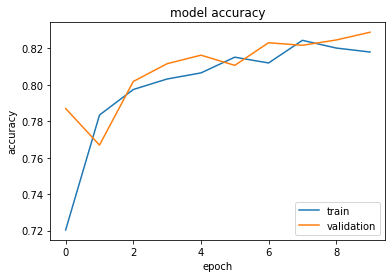

In [297]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

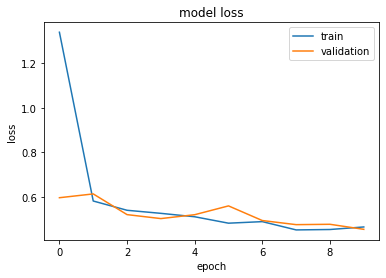

In [298]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [73]:
model = create_mlp()
model.load_weights("models/best-weights-mlp.hdf5")
scores = model.evaluate(x_test, y_test, verbose=0)
print("Loaded best validation weights:\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


Loaded best validation weights:
accuracy: 86.91%


### CNN

In [299]:
model = create_cnn()
callbacks_list = create_callbacks("cnn")
history = model.fit(x_train.reshape(60000,28,28,1), 
          y_train, 
          epochs=10,
          validation_split = 0.2,
          callbacks = callbacks_list
         )

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
47808/48000 [============================>.] - ETA: 0s - loss: 0.6326 - accuracy: 0.8039
Epoch 00001: val_accuracy improved from -inf to 0.85150, saving model to models/best-weights-cnn.hdf5
48000/48000 [==============================] - 13s 270us/sample - loss: 0.6314 - accuracy: 0.8042 - val_loss: 0.4107 - val_accuracy: 0.8515
Epoch 2/10
47968/48000 [============================>.] - ETA: 0s - loss: 0.3616 - accuracy: 0.8700
Epoch 00002: val_accuracy improved from 0.85150 to 0.87058, saving model to models/best-weights-cnn.hdf5
48000/48000 [==============================] - 12s 260us/sample - loss: 0.3615 - accuracy: 0.8701 - val_loss: 0.3633 - val_accuracy: 0.8706
Epoch 3/10
47904/48000 [============================>.] - ETA: 0s - loss: 0.3147 - accuracy: 0.8858
Epoch 00003: val_accuracy improved from 0.87058 to 0.88117, saving model to models/best-weights-cnn.hdf5
48000/48000 [==============================] - 14s 295us/s

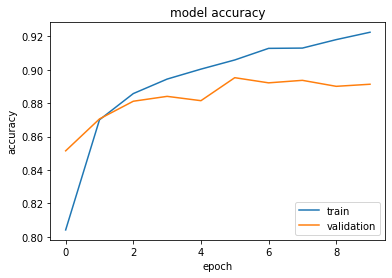

In [300]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

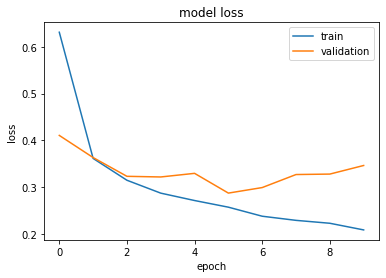

In [301]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [303]:
model = create_cnn()
model.load_weights("models/best-weights-cnn.hdf5")
scores = model.evaluate(x_test.reshape(10000,28,28,1), y_test, verbose=0)
print("Loaded best validation weights:\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Loaded best validation weights:
accuracy: 89.12%


## Data Augmentation

In [277]:
def rotate(x,y):
    tmp_s = x.shape
    tmp_y = y
    for j in range(3):
        tmp_x = np.ndarray(tmp_s)
        for i in range(tmp_s[0]):
            print("%d percent complete"%(i/tmp_s[0]*100),end='\r')
            tmp_x[i] = tf.image.rot90(x[i,:,:].reshape(28,28,1),j+1).numpy().reshape(28,28)
        x = np.concatenate((x,tmp_x),axis = 0)
        y = np.concatenate((y,tmp_y),axis = None)
    return(x,y)



In [278]:
x_train_rot, y_train_rot = rotate(x_train,y_train)

In [279]:
x_test_rot, y_test_rot = rotate(x_test,y_test)

## Augmented Data

### MLP

In [271]:
def create_callbacks2(mod):
    if mod == "mlp":
        filepath = "models/best-weights-mlp2.hdf5"
    elif mod == "cnn":
        filepath = "models/best-weights-cnn2.hdf5"
    else:
        print("Error")
        return(-1)
    model_checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
    return([model_checkpoint])

In [284]:
model = create_mlp()
callbacks_list = create_callbacks2("mlp")
history = model.fit(x_train_rot, 
          y_train_rot, 
          epochs=10,
          validation_split = 0.2,
          callbacks = callbacks_list
         )

Train on 192000 samples, validate on 48000 samples
Epoch 1/10
191968/192000 [============================>.] - ETA: 0s - loss: 1.0918 - accuracy: 0.6211
Epoch 00001: val_accuracy improved from -inf to 0.59381, saving model to models/best-weights-mlp2.hdf5
192000/192000 [==============================] - 25s 130us/sample - loss: 1.0917 - accuracy: 0.6211 - val_loss: 1.0984 - val_accuracy: 0.5938
Epoch 2/10
191840/192000 [============================>.] - ETA: 0s - loss: 0.7595 - accuracy: 0.7013
Epoch 00002: val_accuracy improved from 0.59381 to 0.60629, saving model to models/best-weights-mlp2.hdf5
192000/192000 [==============================] - 25s 129us/sample - loss: 0.7595 - accuracy: 0.7014 - val_loss: 1.0749 - val_accuracy: 0.6063
Epoch 3/10
191584/192000 [============================>.] - ETA: 0s - loss: 0.7012 - accuracy: 0.7195
Epoch 00003: val_accuracy improved from 0.60629 to 0.64110, saving model to models/best-weights-mlp2.hdf5
192000/192000 [=============================

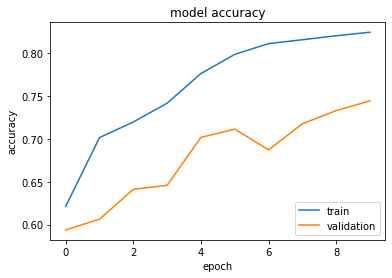

In [285]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

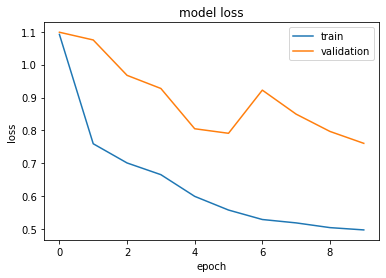

In [286]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [295]:
model = create_mlp()
model.load_weights("models/best-weights-mlp2.hdf5")
scores = model.evaluate(x_test_rot, y_test_rot, verbose=0)
print("Loaded best validation weights:\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


Loaded best validation weights:
accuracy: 80.04%


### CNN

In [289]:
model = create_cnn()
callbacks_list = create_callbacks2("cnn")
history = model.fit(x_train_rot.reshape(240000,28,28,1), 
          y_train_rot, 
          epochs=10,
          validation_split = 0.2,
          callbacks = callbacks_list
         )


Train on 192000 samples, validate on 48000 samples
Epoch 1/10
191776/192000 [============================>.] - ETA: 0s - loss: 0.6007 - accuracy: 0.7910
Epoch 00001: val_accuracy improved from -inf to 0.71892, saving model to models/best-weights-cnn2.hdf5
192000/192000 [==============================] - 50s 261us/sample - loss: 0.6004 - accuracy: 0.7911 - val_loss: 0.7811 - val_accuracy: 0.7189
Epoch 2/10
191840/192000 [============================>.] - ETA: 0s - loss: 0.4079 - accuracy: 0.8525
Epoch 00002: val_accuracy improved from 0.71892 to 0.78500, saving model to models/best-weights-cnn2.hdf5
192000/192000 [==============================] - 58s 303us/sample - loss: 0.4078 - accuracy: 0.8525 - val_loss: 0.6016 - val_accuracy: 0.7850
Epoch 3/10
191904/192000 [============================>.] - ETA: 0s - loss: 0.3634 - accuracy: 0.8681
Epoch 00003: val_accuracy improved from 0.78500 to 0.79175, saving model to models/best-weights-cnn2.hdf5
192000/192000 [=============================

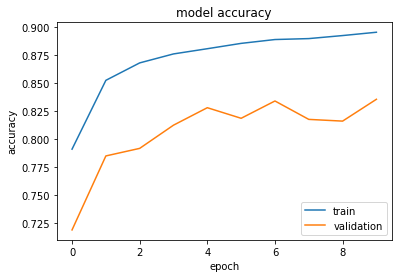

In [290]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

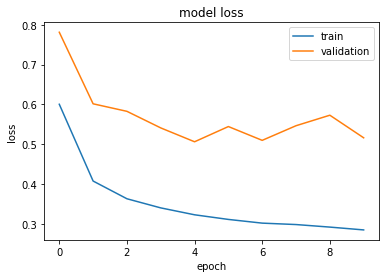

In [291]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [294]:
model = create_cnn()
model.load_weights("models/best-weights-cnn2.hdf5")
scores = model.evaluate(x_test_rot.reshape(40000,28,28,1), y_test_rot, verbose=0)
print("Loaded best validation weights:\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Loaded best validation weights:
accuracy: 86.34%


In [292]:
x_test.shape

(10000, 28, 28)